In [1]:
import pandas as pd

In [2]:
links_df = pd.read_csv('Data/links.csv')
movies_df = pd.read_csv('Data/movies.csv')
ratings_df = pd.read_csv('Data/ratings.csv')
tags_df = pd.read_csv('Data/tags.csv')

In [3]:
links_df.head(2)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0


In [4]:
movies_df.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [5]:
ratings_df.head(2)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247


tags_df.head(20)

In [6]:
df_user = ratings_df.drop('timestamp',axis = 1)

In [7]:
df_user

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [8]:
df_user.isna().sum()

userId     0
movieId    0
rating     0
dtype: int64

In [9]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int64  
 1   movieId  100836 non-null  int64  
 2   rating   100836 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


In [10]:
tags_df.isna().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [11]:
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [12]:
movies_df.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [13]:
links_df.isna().sum()

movieId    0
imdbId     0
tmdbId     8
dtype: int64

In [14]:
df_movies = pd.merge(df_user,movies_df,on='movieId')

In [15]:
df_movies.head()

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [16]:
df_movies.head(20)

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
5,18,1,3.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
6,19,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
7,21,1,3.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
8,27,1,3.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
9,31,1,5.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [17]:
df_movies.groupby(by = 'userId')['title'].count()

userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: title, Length: 610, dtype: int64

In [18]:
df_movies.sort_values(by= "userId")

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12117,1,2389,2.0,Psycho (1998),Crime|Horror|Thriller
12126,1,2395,5.0,Rushmore (1998),Comedy|Drama
12182,1,2406,4.0,Romancing the Stone (1984),Action|Adventure|Comedy|Romance
776,1,70,3.0,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
...,...,...,...,...,...
84152,610,51709,5.0,"Host, The (Gwoemul) (2006)",Comedy|Drama|Horror|Sci-Fi|Thriller
26937,610,589,5.0,Terminator 2: Judgment Day (1991),Action|Sci-Fi
69808,610,66097,4.0,Coraline (2009),Animation|Fantasy|Thriller
69820,610,71464,4.0,"Serious Man, A (2009)",Comedy|Drama


In [19]:
df_movies['rating'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [31]:
title_count = df_movies.groupby(by = 'title')['userId'].sum().sort_values(ascending = False)

In [87]:
title_count.unique().sum()

27996510

In [34]:
title_count.head(10)

title
Forrest Gump (1994)                          101385
Shawshank Redemption, The (1994)              95829
Pulp Fiction (1994)                           90621
Silence of the Lambs, The (1991)              85535
Matrix, The (1999)                            85236
Star Wars: Episode IV - A New Hope (1977)     76484
Jurassic Park (1993)                          74065
Braveheart (1995)                             73375
Fight Club (1999)                             69737
Schindler's List (1993)                       69481
Name: userId, dtype: int64

In [32]:
%matplotlib inline

In [54]:
import matplotlib.pyplot as plt

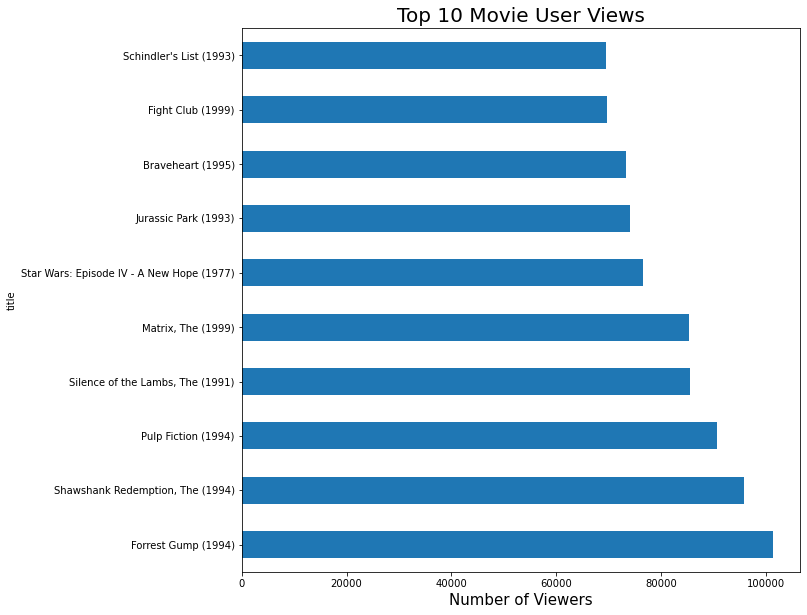

In [83]:
fig, ax = plt.subplots(figsize = (10,10))
ax.set_xlabel('Number of Viewers',size = 15)
ax.set_ylabel('Movie',size = 10)
ax.set_title('Top 10 Movie User Views',size = 20)
title_count.head(10).plot.barh()
plt.show()

In [51]:
df_t = df_movies.drop(['title','genres'],axis = 1)

In [84]:
from surprise import Reader, Dataset
# read in values as Surprise dataset 
data = Dataset.load_from_df(df_t,Reader())


In [85]:
data

In [109]:
movie_df2 = movies_df.copy()

In [111]:
movie_df2 = movie_df2['genres'].str.strip().str.split('|')

In [113]:
genres_df = movie_df2.explode('genres')

<AxesSubplot:title={'center':'Most Popular Categories'}, xlabel='Number of Viewers', ylabel='Movie'>

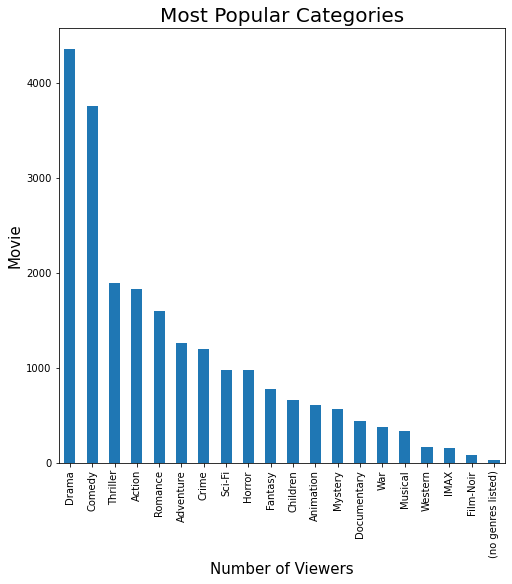

In [123]:
fig, ax = plt.subplots(figsize = (8,8))

ax.set_xlabel('Number of Viewers',size = 15)
ax.set_ylabel('Movie',size = 15)
ax.set_title('Most Popular Categories',size = 20)

genres_df.value_counts().plot.bar()